In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import community as cm

import scipy.cluster.hierarchy as hier

### Agrupamento hierárquico

O agrupamento hierárquico inicia com os nós isolados, cada um formando uma comunidade, e a cada etapa acrescenta aos grupos nós de acordo com alguma medida de similaridade.

Algumas medidas podem ser usadas para quantificar a similaridade entre nós. 
No método **CONCOR**, usamos a correlação de Pearson entre as linhas da matriz de adjacência correspondente a dois nós, como uma medida de similaridade entre eles. 

Outras medidas de similaridades: o recíproco da distância Euclideana entre as linhas da matriz, ou o número de nós na rede menos o número de vizinhos que está na vizinhança de apenas um dos nós em cada par.

Seja $s_{ij} (G)$ uma medida de similaridade entre os vértices $i$ e $j$ no grafo G. 

Construa um grafo com o mesmo conjunto de nós, ligados entre si se a similaridade entre eles for maior ou igual a um certo valor limiar $\delta \geq 0$.

Formalmente temos $G^{s,\delta} = (V, E^{s,\delta})$ onde $E^{s,\delta} = \{ (i, j) : s_{ij}(G) ≥ \delta \}$.

Para um dado valor de $\delta$, as componentes de $G^{s,\delta}$ são as comunidades da rede original $G$.

O termo hierárquico vem do fato de que se $i$ e $j$ pertencem a uma mesma comunidade para algum valor de $\delta$, eles continuarão na mesma comunidade se diminuirmos o valor de $\delta$. 
De modo que as comunidades para valores pequenos de $\delta$ contém as comunidades para valores maiores de $\delta$, formando uma hierarquia.

O **networkx** não possui funções para encontrar um agrupamento hierárquico de um conjunto de vértices de uma rede. 

O pacote **SciPy** tem um sub-pacote, chamado **clustering.hierachical**. 
Entre as funções deste pacote, encontramos **linkage** que constrói agrupamentos hierárquicos usando diversos critérios. 

Alguns desses critérios são:

- **complete linkage**: a similaridade entre dois grupos é medida como a mínima similaridade entre cada par de vértices.

- **single linkage**: a similaridade entre dois grupos é medida como a máxima similaridade entre cada par de vértices.

- **average linkage**: a similaridade entre dois grupos é medida como a média das similaridades entre cada par de vértices.

Esse algoritmo inicia com a união dos dois vértices que têm a maior similaridade, em seguida faz une os dois grupos com maior similaridade, de acordo com o tipo de ligação usada.

**Exemplo**

Considere o exemplo dos personagens do segundo livro da saga de Harry Potter.

In [4]:
atri = pd.read_csv('../../data/harrypotter/hpattributes.txt', sep='\t')
ares = pd.read_csv('../../data/harrypotter/hpbook2.txt', sep=' ', header=None)
nome = pd.read_csv('../../data/harrypotter/hpnames.txt', sep='\t')

In [5]:
# criando a rede

gpotter = nx.DiGraph()

n = atri.shape[0]

for k in range(n):
    gpotter.add_node(k,
                     nome = nome['name'][k],
                     ano = atri['schoolyear'][k],
                     gen = atri['gender'][k],
                     casa = atri['house'][k])

for k in range(n):
    for m in range(n):
        if ares.values[k][m] == 1:
            gpotter.add_edge(k,m)

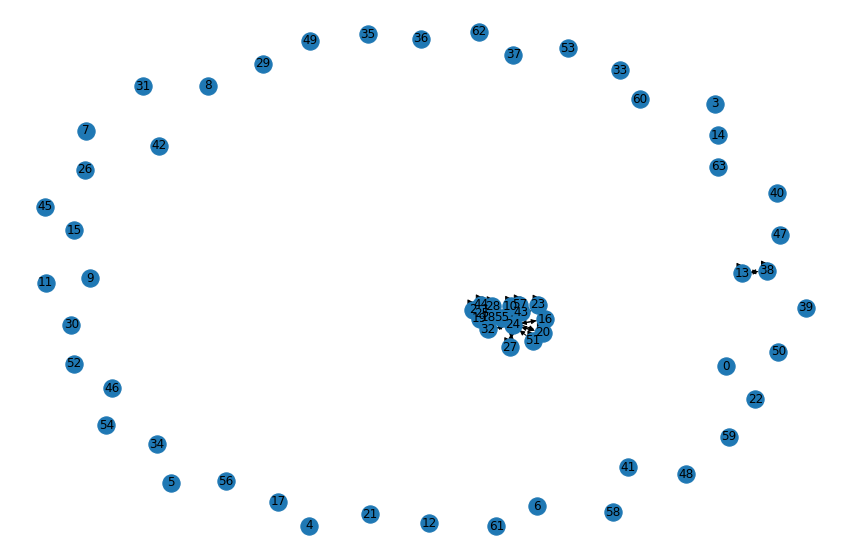

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [7]:
# matriz de adjacencia esparsa
A = nx.to_scipy_sparse_array(gpotter)#.toarray()

# eliminando os nos isolados
isolados = []
for k in range(n):
    if np.sum(A[[k],:]) == 0:
        isolados.append(k)
        gpotter.remove_node(k)

print(len(isolados), 'nos isolados.')

print(f"#nodes de G = {nx.number_of_nodes(gpotter)}")
print(f"#edges de G = {nx.number_of_edges(gpotter)}")

44 nos isolados.
#nodes de G = 20
#edges de G = 110


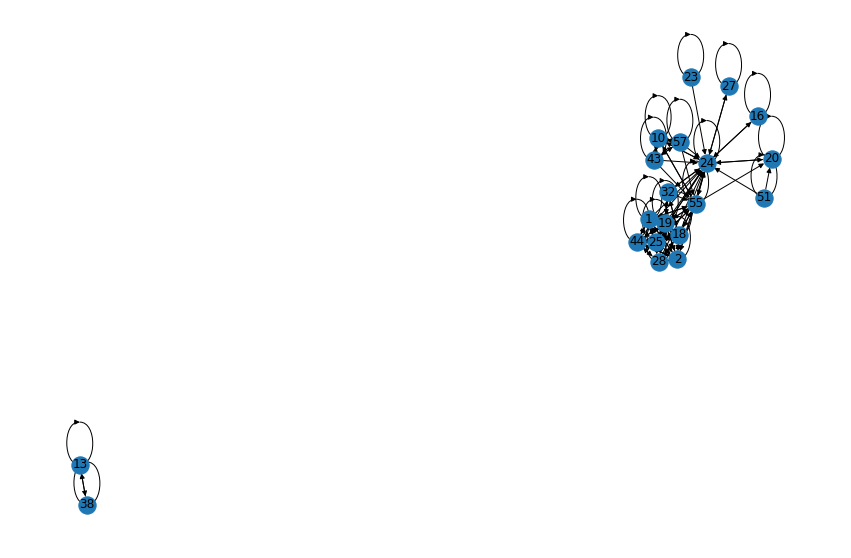

In [8]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

nx.draw(gpotter,with_labels=True)

In [9]:
# matriz de adjacencia esparsa
#A = nx.adjacency_matrix(gpotter)
A = nx.to_scipy_sparse_array(gpotter)#.toarray()

# matriz de adjacencia densa
A = np.array(A.todense(), dtype = float)

# as linhas como observações
S = np.copy(A.T)

In [10]:
# calcula agrupamento hierarquico usando critério complete
agru_hier_complete = hier.linkage(S, 'complete', metric='euclidean')

In [11]:
agru_hier_complete

array([[ 0.        ,  1.        ,  0.        ,  2.        ],
       [ 5.        ,  6.        ,  0.        ,  2.        ],
       [15.        , 19.        ,  0.        ,  2.        ],
       [ 3.        , 14.        ,  0.        ,  2.        ],
       [12.        , 16.        ,  0.        ,  2.        ],
       [20.        , 21.        ,  1.        ,  4.        ],
       [ 2.        , 22.        ,  1.41421356,  3.        ],
       [ 4.        , 11.        ,  1.41421356,  2.        ],
       [24.        , 25.        ,  1.41421356,  6.        ],
       [ 8.        , 17.        ,  1.41421356,  2.        ],
       [13.        , 27.        ,  1.73205081,  3.        ],
       [23.        , 29.        ,  1.73205081,  4.        ],
       [10.        , 18.        ,  2.        ,  2.        ],
       [ 7.        , 30.        ,  2.23606798,  4.        ],
       [31.        , 33.        ,  2.44948974,  8.        ],
       [26.        , 34.        ,  2.64575131, 11.        ],
       [28.        , 32.

In [12]:
# etiquetas
names = [gpotter.nodes[n]['nome'] for n in gpotter.nodes]

**set_link_color_palette()**: define uma lista de cores do **matplotlib** a serem utilizadas.

In [13]:
# define cores das linhas do grafico
hier.set_link_color_palette(['b'])

**hier.dendrogram()**: Gera gráfico de um agrupamento hierárquico como um dendrograma.

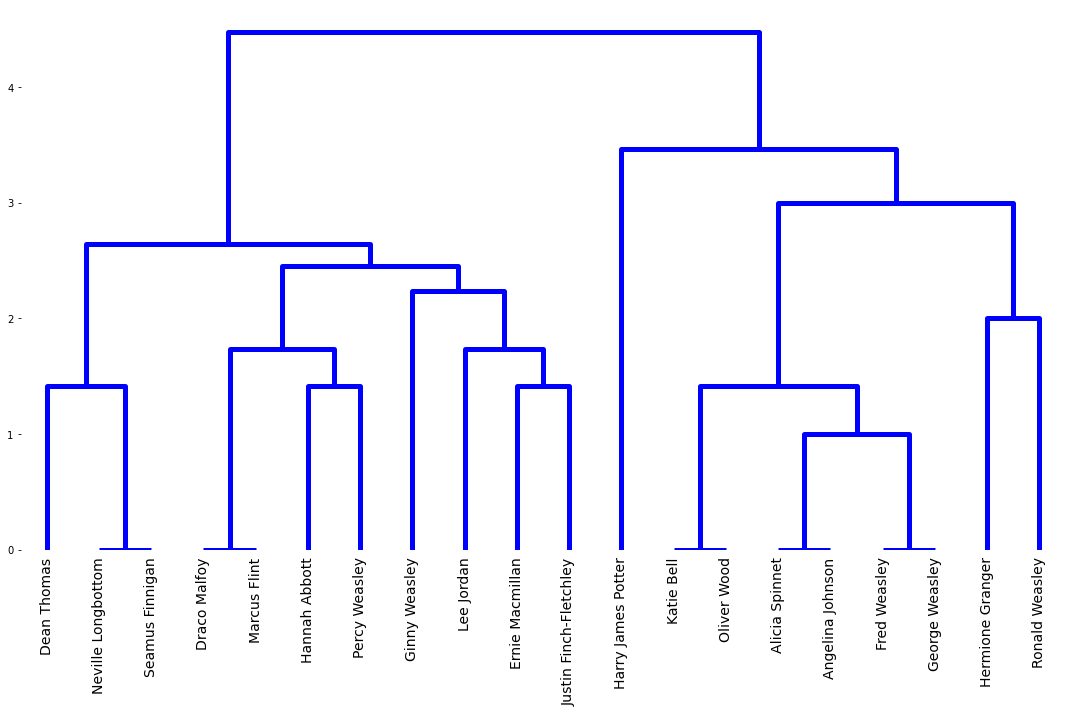

In [14]:
# gera um dendrograma de agrupamento hierárquico com critério complete 
# aplicado a uma rede de personagens do segundo livro da saga Harry Potter

fig, ax = plt.subplots(1, 1, figsize = (15,10))

with plt.rc_context({'lines.linewidth': 5}):
    dn = hier.dendrogram(agru_hier_complete, 
                         color_threshold = np.inf,
                         leaf_rotation = 'vertical', 
                         leaf_font_size = 14, 
                         labels = names )
    
plt.tight_layout()
plt.box(False)
plt.show()

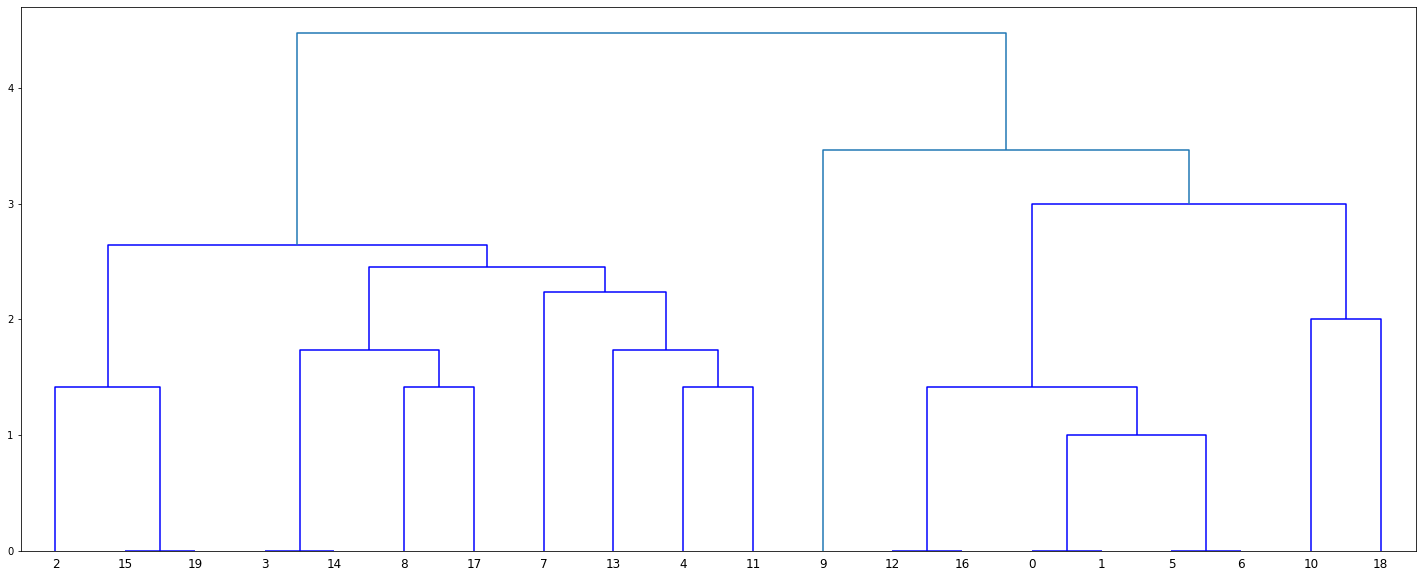

In [15]:
fig = plt.figure(figsize=(25, 10))
dn = hier.dendrogram(agru_hier_complete)
plt.show()

In [16]:
# calcula agrupamento hierarquico com critério single
agru_hier_sigle = hier.linkage(S, 'single', metric='euclidean')

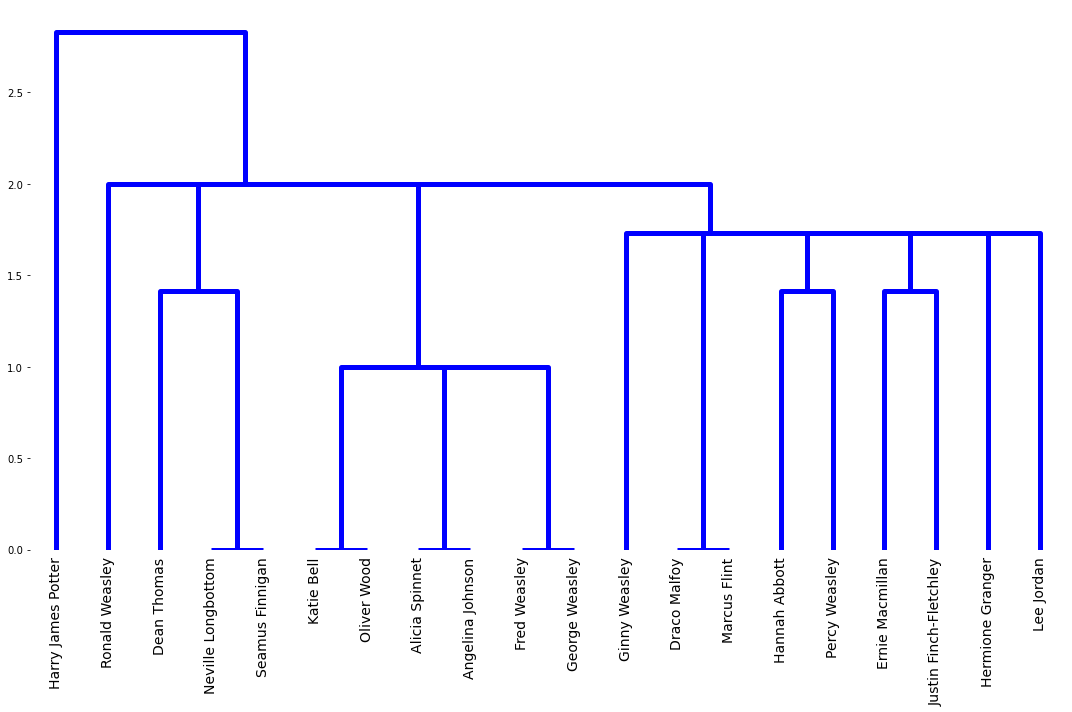

In [17]:
# gera um dendrograma de agrupamento hierárquico com critério single
# aplicado a uma rede de personagens do segundo livro da saga Harry Potter

fig, ax = plt.subplots(1, 1, figsize = (15,10))

with plt.rc_context({'lines.linewidth': 5}):
    dn = hier.dendrogram(agru_hier_sigle, 
                         color_threshold = np.inf,
                         leaf_rotation = 'vertical', 
                         leaf_font_size = 14, 
                         labels = names )
    
plt.tight_layout()
plt.box(False)
plt.show()

In [18]:
# calcula agrupamento hierarquico com critério average
agru_hier_average = hier.linkage(S, 'average', metric='euclidean')

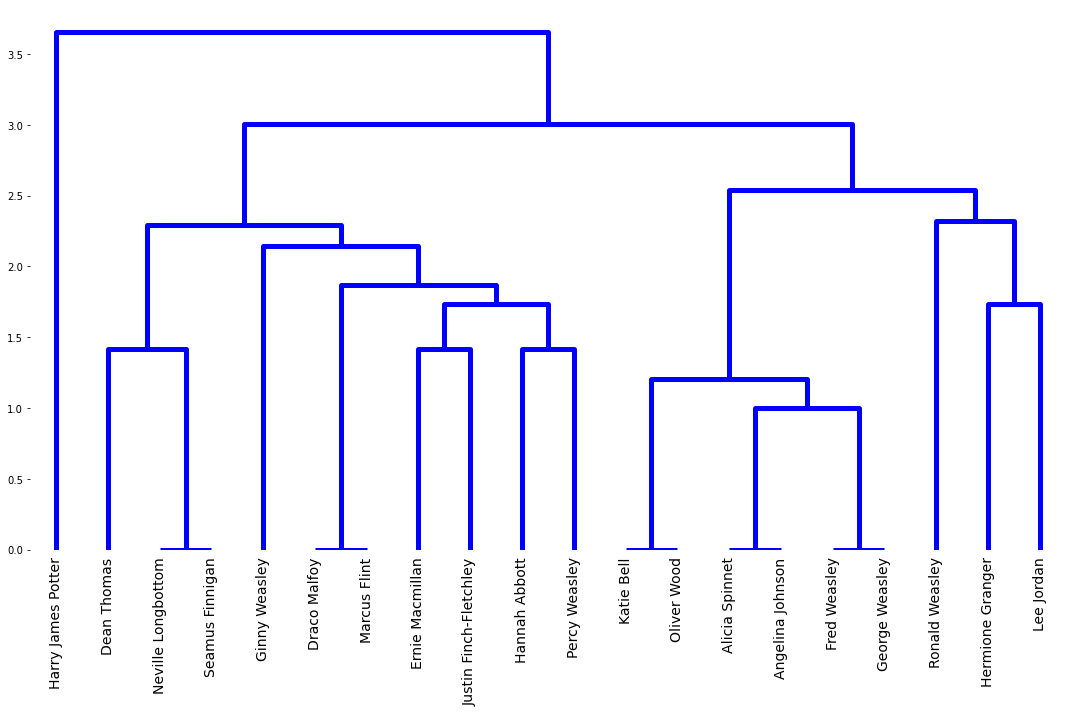

In [19]:
# gera um dendrograma de agrupamento hierárquico com critério average
# aplicado a uma rede de personagens do segundo livro da saga Harry Potter

fig, ax = plt.subplots(1, 1, figsize = (15,10))

with plt.rc_context({'lines.linewidth': 5}):
    dn = hier.dendrogram(agru_hier_average, 
                         color_threshold = np.inf,
                         leaf_rotation = 'vertical', 
                         leaf_font_size = 14, 
                         labels = names )
    
plt.tight_layout()
plt.box(False)
plt.show()